# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make Dataset

In [2]:
# Data
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

AND_Y = np.array([[0], [0], [0], [1]])
OR_Y = np.array([[0], [1], [1], [1]])
XOR_Y = np.array([[0], [1], [1], [0]])

# Define Class
- 정규분포를 따르는 가중치와 편향 w, b를 선언합니다.
- 내적을 통해 나온 값을 sigmoid 함수 $ 1 \over (1 + exp(-x)) $를 거쳐 값을 예측합니다.

In [3]:
# Model
class LogisticRegressionModel():
    def __init__(self):
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, x):
        z = np.inner(x, self.w) + self.b
        y_pred = self.sigmoid(z)
        return y_pred

# Train
- 손실함수에 대한 가중치 w와 편향 b의 기울기를 저장할 변수 dw, db를 선언합니다. 이 때 dw와 db의 크기는 각각 w, b와 같습니다.
- 손실함수는 Binary Cross Entropy를 사용하고, 최종 Cost는 평균$\sum Loss\over N$을 취합니다.
$$ Loss = -y*log(y\_pred)-(1-y)*log(1-y\_pred) $$
- Cost에 대한 w, b의 기울기는 다음과 같습니다.    
$${dL\over dw}  = {(y\_pred-y)*x} $$$$ {dL\over db}=y\_pred-y$$
- 각 모델에 대하여 10000번의 학습을 진행하였습니다.
- 이 때, Loss 그래프를 그리기 위하여 매 반복마다 Cost를 리스트에 저장하였습니다.

## Define Functions

In [4]:
# train function
def train(X, Y, model, lr=1e-1):
    dw = np.zeros_like(model.w, dtype=np.float32)
    db = np.zeros_like(model.b, dtype=np.float32)
    m = X.shape[0]
    cost = 0.
    for x, y in zip(X, Y):
        y_pred = model.predict(x)
        if y == 1:
            cost -= np.log(y_pred)
        else:
            cost -= np.log(1 - y_pred)
        dw += (y_pred - y) * x
        db += (y_pred - y)

    cost /= m
    model.w -= lr * dw / m
    model.b -= lr * db / m

    return cost

# save loss of each 3 model
def save_loss(X, Y, models):
    cost1, cost2, cost3 = 0, 0, 0
    cost_list_1, cost_list_2, cost_list_3 = [], [], []

    costs = [cost1, cost2, cost3]
    cost_list = [cost_list_1, cost_list_2, cost_list_3]
    lr_list = [1e-1, 1e-2, 1e-3]

    epochs = 10001
    for i, model in enumerate(models):
        print("model{} : lr = {}".format(i + 1, lr_list[i]))
        for t in range(epochs):
            costs[i] = train(X, Y, model, lr=lr_list[i])
            cost_list[i].append(costs[i])
            if t % 2000 == 0:
                print("epoch: {:<5d}   loss: {:.4f}".format(t, costs[i][0]))
        print("\n")
    return cost_list


## Define Models

- 학습률을 다르게 하여 학습을 진행하기 위하여 각각 세 모델을 선언하였습니다.

In [5]:
# define models
AND_model1, AND_model2, AND_model3 = [LogisticRegressionModel() for i in range(3)]
OR_model1, OR_model2, OR_model3 = [LogisticRegressionModel() for i in range(3)]
XOR_model1, XOR_model2, XOR_model3 = [LogisticRegressionModel() for i in range(3)]

AND_models = [eval(f"AND_model{i}") for i in range(1, 4)]
OR_models = [eval(f"OR_model{i}") for i in range(1, 4)]
XOR_models = [eval(f"XOR_model{i}") for i in range(1, 4)]

## Train And-Operator Model

In [6]:
AND_loss = save_loss(X, AND_Y, AND_models)

model1 : lr = 0.1
epoch: 0       loss: 0.7632
epoch: 2000    loss: 0.0811
epoch: 4000    loss: 0.0429
epoch: 6000    loss: 0.0289
epoch: 8000    loss: 0.0218
epoch: 10000   loss: 0.0174


model2 : lr = 0.01
epoch: 0       loss: 0.7569
epoch: 2000    loss: 0.3824
epoch: 4000    loss: 0.2671
epoch: 6000    loss: 0.2083
epoch: 8000    loss: 0.1713
epoch: 10000   loss: 0.1455


model3 : lr = 0.001
epoch: 0       loss: 0.5632
epoch: 2000    loss: 0.5142
epoch: 4000    loss: 0.4809
epoch: 6000    loss: 0.4537
epoch: 8000    loss: 0.4300
epoch: 10000   loss: 0.4090




## Train OR-Operator Model

In [7]:
OR_loss = save_loss(X, OR_Y, OR_models)

model1 : lr = 0.1
epoch: 0       loss: 0.6063
epoch: 2000    loss: 0.0476
epoch: 4000    loss: 0.0237
epoch: 6000    loss: 0.0157
epoch: 8000    loss: 0.0117
epoch: 10000   loss: 0.0093


model2 : lr = 0.01
epoch: 0       loss: 1.7811
epoch: 2000    loss: 0.2900
epoch: 4000    loss: 0.1938
epoch: 6000    loss: 0.1436
epoch: 8000    loss: 0.1132
epoch: 10000   loss: 0.0930


model3 : lr = 0.001
epoch: 0       loss: 0.6664
epoch: 2000    loss: 0.5283
epoch: 4000    loss: 0.4702
epoch: 6000    loss: 0.4335
epoch: 8000    loss: 0.4049
epoch: 10000   loss: 0.3804




## Train XOR-Operator Model

In [8]:
XOR_loss = save_loss(X, XOR_Y, XOR_models)

model1 : lr = 0.1
epoch: 0       loss: 0.9207
epoch: 2000    loss: 0.6931
epoch: 4000    loss: 0.6931
epoch: 6000    loss: 0.6931
epoch: 8000    loss: 0.6931
epoch: 10000   loss: 0.6931


model2 : lr = 0.01
epoch: 0       loss: 1.1464
epoch: 2000    loss: 0.7114
epoch: 4000    loss: 0.6960
epoch: 6000    loss: 0.6937
epoch: 8000    loss: 0.6932
epoch: 10000   loss: 0.6932


model3 : lr = 0.001
epoch: 0       loss: 0.7030
epoch: 2000    loss: 0.7009
epoch: 4000    loss: 0.6993
epoch: 6000    loss: 0.6980
epoch: 8000    loss: 0.6971
epoch: 10000   loss: 0.6963




# Loss Graph

- 학습률을 1e-1, 1e-2, 1e-3 으로 지정하였을 때의 Loss 그래프입니다.
- 학습률을 1e-1로 지정하였을 때, 가장 빠르게 수렴하는 것을 확인할 수 있었습니다.
- 또한 XOR 연산자의 경우 학습이 제대로 진행되지 않았습니다.
- 이는 단일 노드만을 이용했기 때문에 발생하는 문제라고 생각합니다.

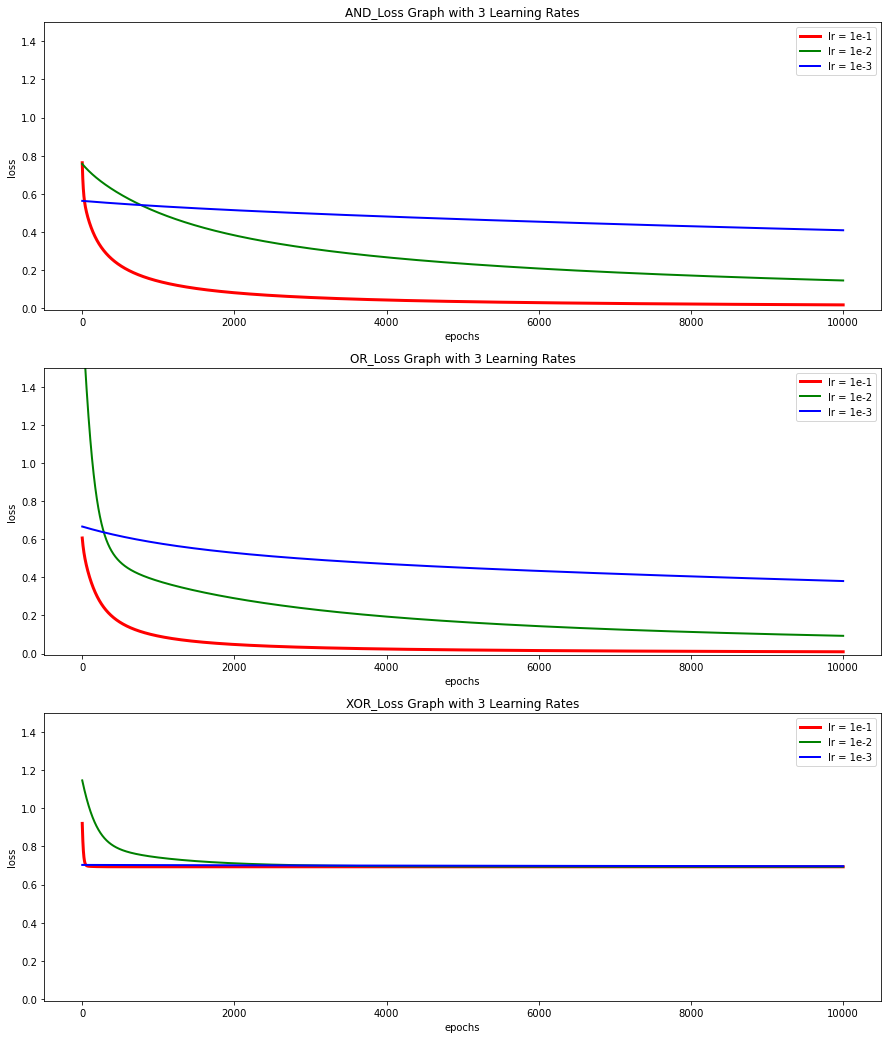

In [9]:
ops = ["AND", "OR", "XOR"]
colors = ['r', 'g', 'b']
epochs = 10001
plt.figure(figsize=(15, 18))
for i, op in enumerate(ops):
    plt.subplot(3, 1, i + 1)
    plt.ylim(-0.01, 1.5)
    for j in range(3):
        plt.plot(np.arange(epochs),
                 eval(f"{op}_loss[{j}]"),
                 label=f'lr = 1e-{j+1}',
                 color=colors[j],
                 linewidth=3 if j == 0 else 2)
        plt.title(f"{op}_Loss Graph with 3 Learning Rates")
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.legend()
plt.show()

# Predict each operator

In [10]:
AND_model, OR_model, XOR_model = AND_model1, OR_model1, XOR_model1
def predict(X, model):
    print("======",model,"=====")
    print(" data   predict")
    for x in X:
        print("{}   {:.4f}".format(x, eval(model).predict(x)[0]))
    print("\n")

In [11]:
predict(X, "AND_model")
predict(X, "OR_model")
predict(X, "XOR_model")

====== AND_model =====
 data   predict
[0 0]   0.0000
[1 0]   0.0202
[0 1]   0.0202
[1 1]   0.9717


====== OR_model =====
 data   predict
[0 0]   0.0206
[1 0]   0.9918
[0 1]   0.9918
[1 1]   1.0000


====== XOR_model =====
 data   predict
[0 0]   0.5000
[1 0]   0.5000
[0 1]   0.5000
[1 1]   0.5000


